Loading data...
Training set: (2000, 55)
Features: 55
Targets: 10

Performing 5-fold cross validation...

Cross-validating: BlendProperty1
  Fold 1/5
    RMSE: 0.2644, R²: 0.9298, MAE: 0.2052
  Fold 2/5
    RMSE: 0.2597, R²: 0.9272, MAE: 0.1997
  Fold 3/5
    RMSE: 0.2620, R²: 0.9331, MAE: 0.1994
  Fold 4/5
    RMSE: 0.2648, R²: 0.9331, MAE: 0.2040
  Fold 5/5
    RMSE: 0.2861, R²: 0.9129, MAE: 0.2202
  Average RMSE: 0.2674 ± 0.0095
  Average R²: 0.9272 ± 0.0075
  Average MAE: 0.2057 ± 0.0076

Cross-validating: BlendProperty2
  Fold 1/5
    RMSE: 0.2414, R²: 0.9415, MAE: 0.1903
  Fold 2/5
    RMSE: 0.2662, R²: 0.9293, MAE: 0.2065
  Fold 3/5
    RMSE: 0.2498, R²: 0.9377, MAE: 0.1895
  Fold 4/5
    RMSE: 0.2650, R²: 0.9288, MAE: 0.2027
  Fold 5/5
    RMSE: 0.2308, R²: 0.9493, MAE: 0.1812
  Average RMSE: 0.2506 ± 0.0136
  Average R²: 0.9373 ± 0.0077
  Average MAE: 0.1940 ± 0.0093

Cross-validating: BlendProperty3
  Fold 1/5
    RMSE: 0.2291, R²: 0.9491, MAE: 0.1684
  Fold 2/5
    RMSE: 0.2

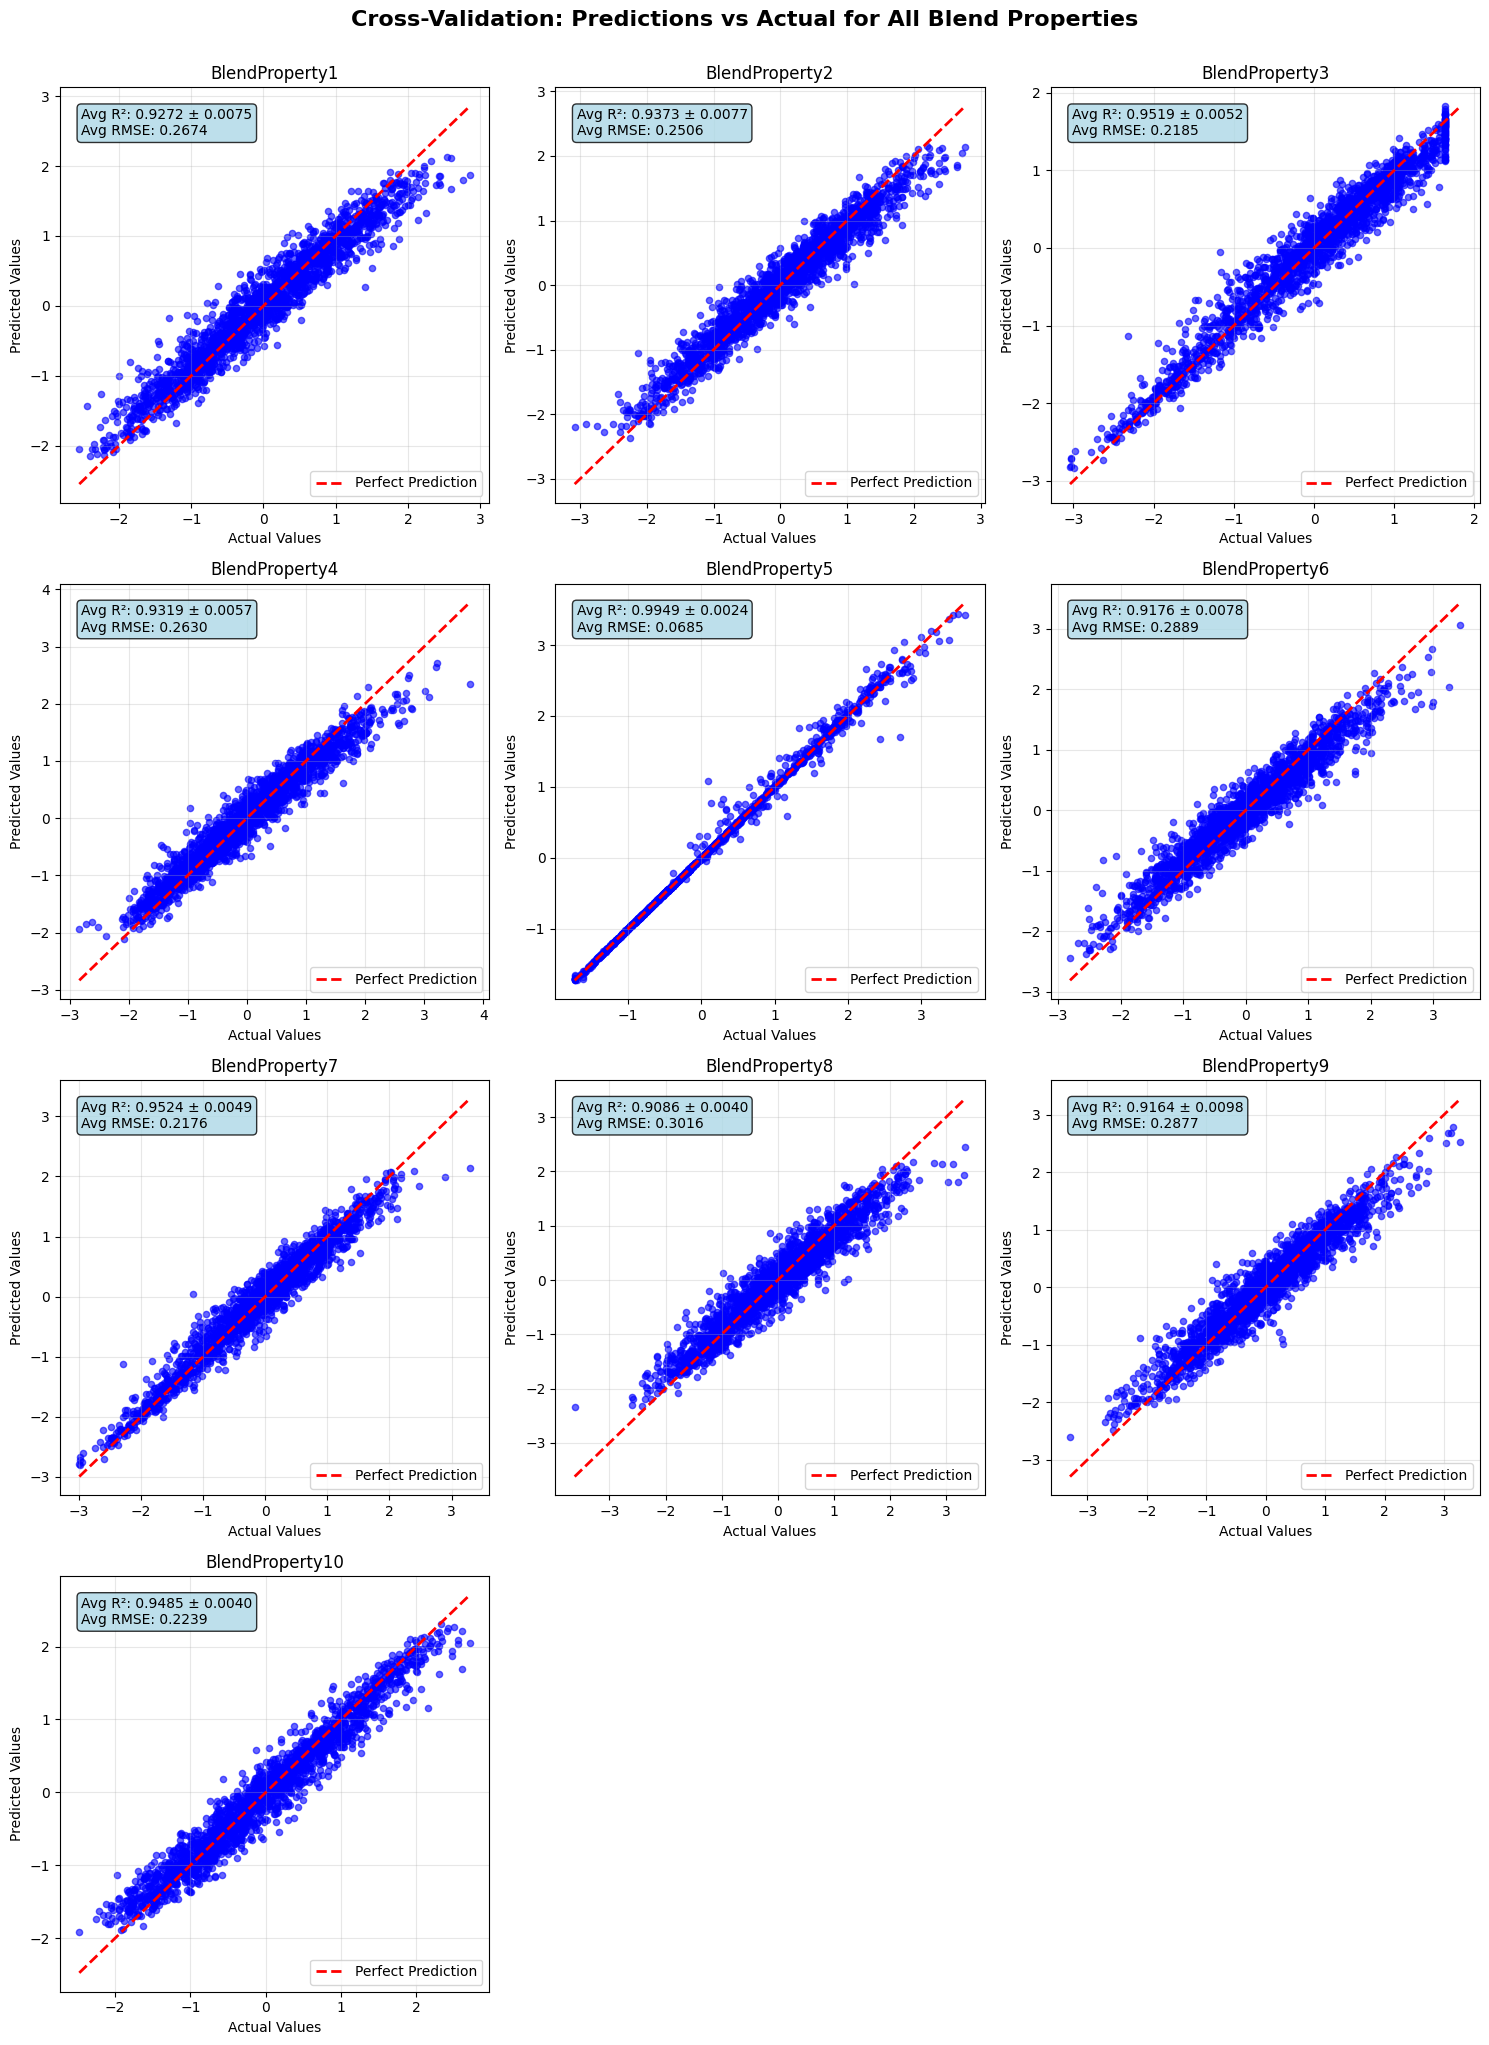

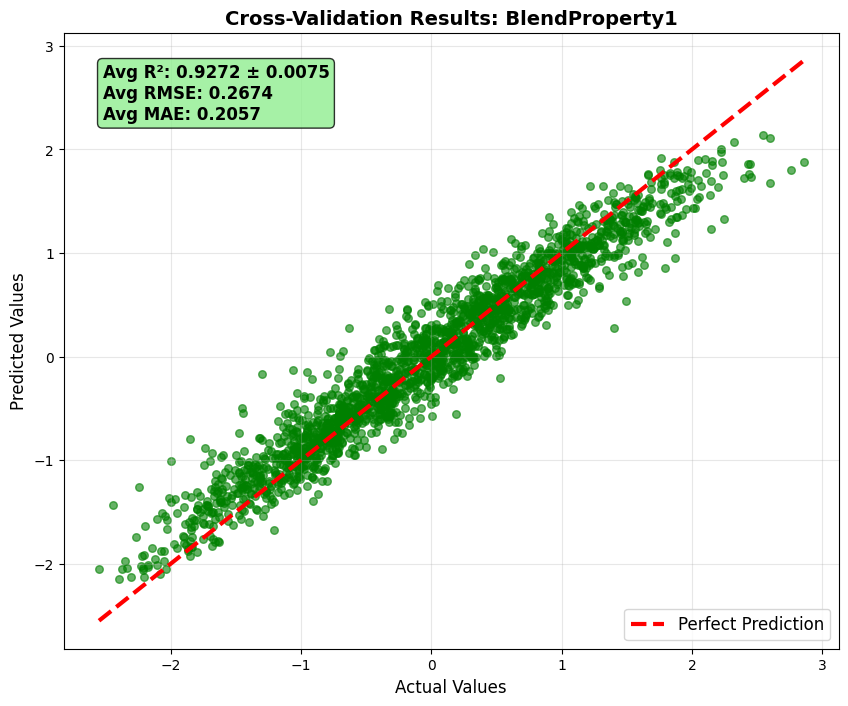

Plot saved as 'cv_predictions_BlendProperty1.png'


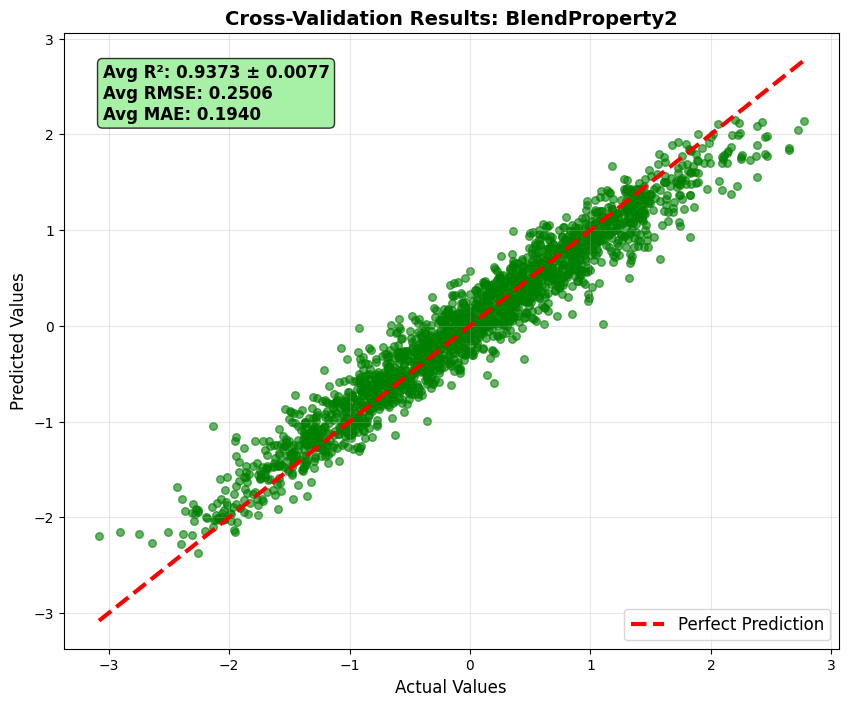

Plot saved as 'cv_predictions_BlendProperty2.png'


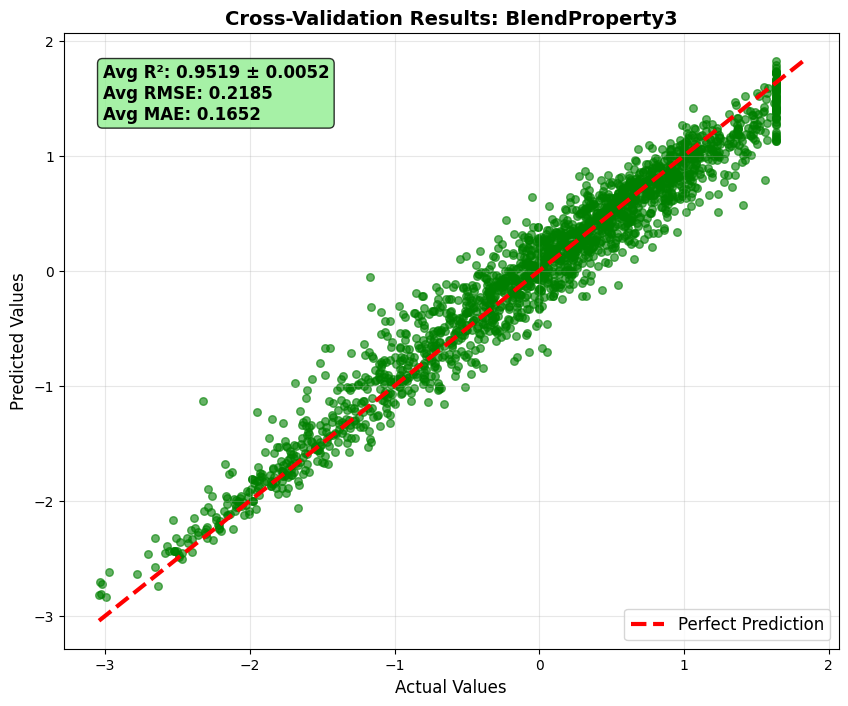

Plot saved as 'cv_predictions_BlendProperty3.png'


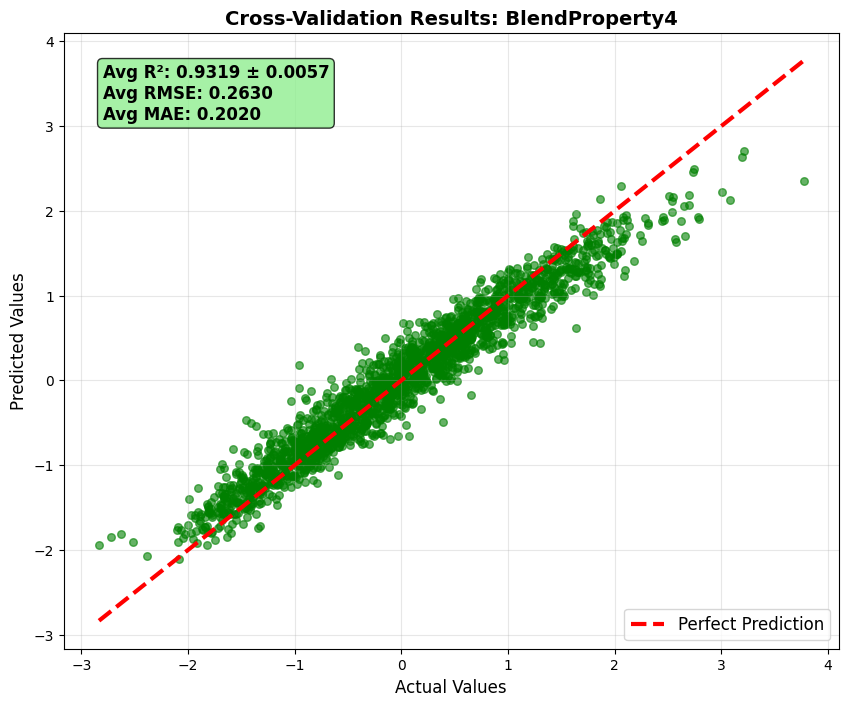

Plot saved as 'cv_predictions_BlendProperty4.png'


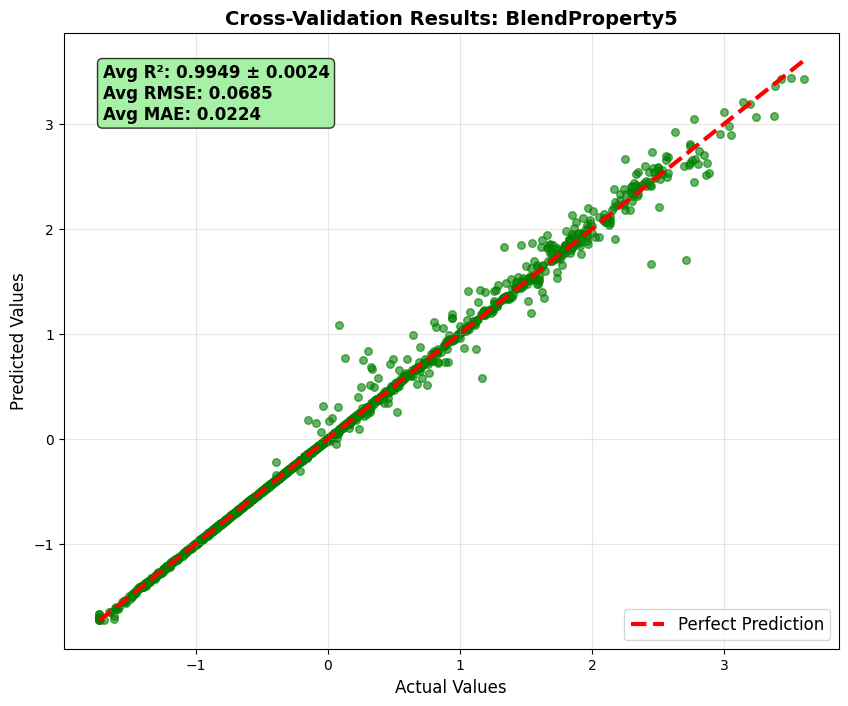

Plot saved as 'cv_predictions_BlendProperty5.png'


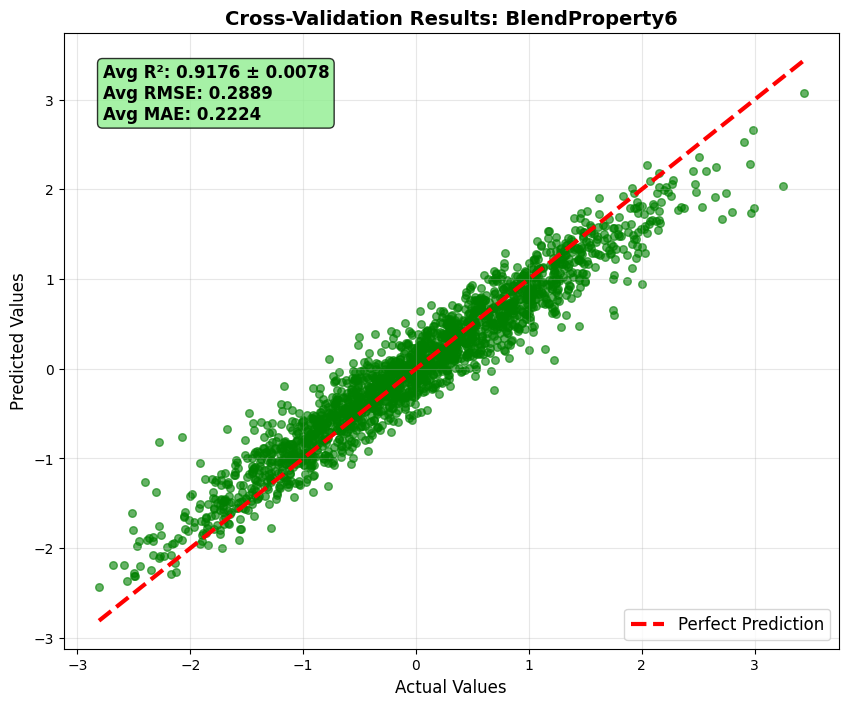

Plot saved as 'cv_predictions_BlendProperty6.png'


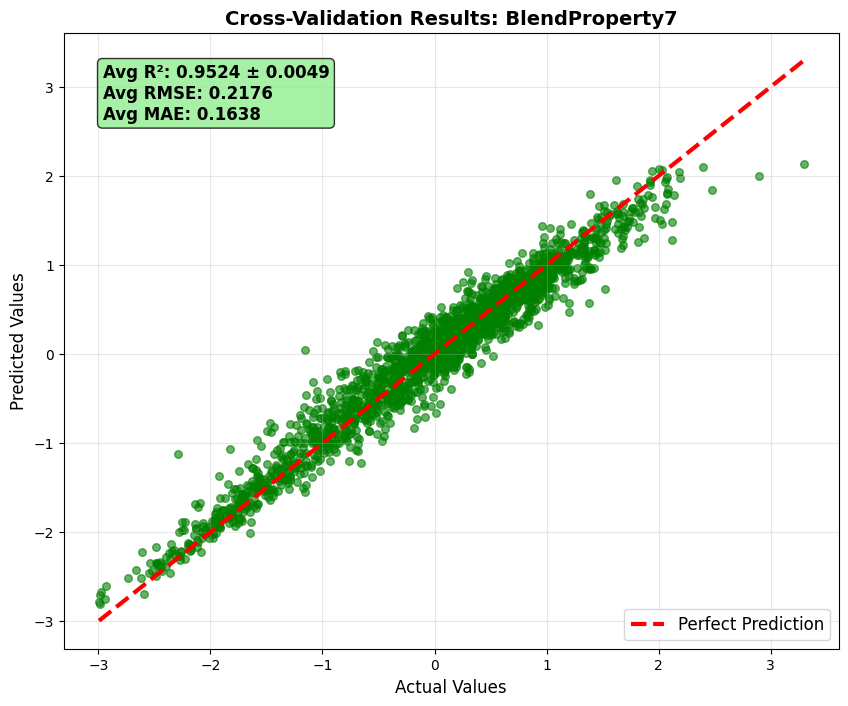

Plot saved as 'cv_predictions_BlendProperty7.png'


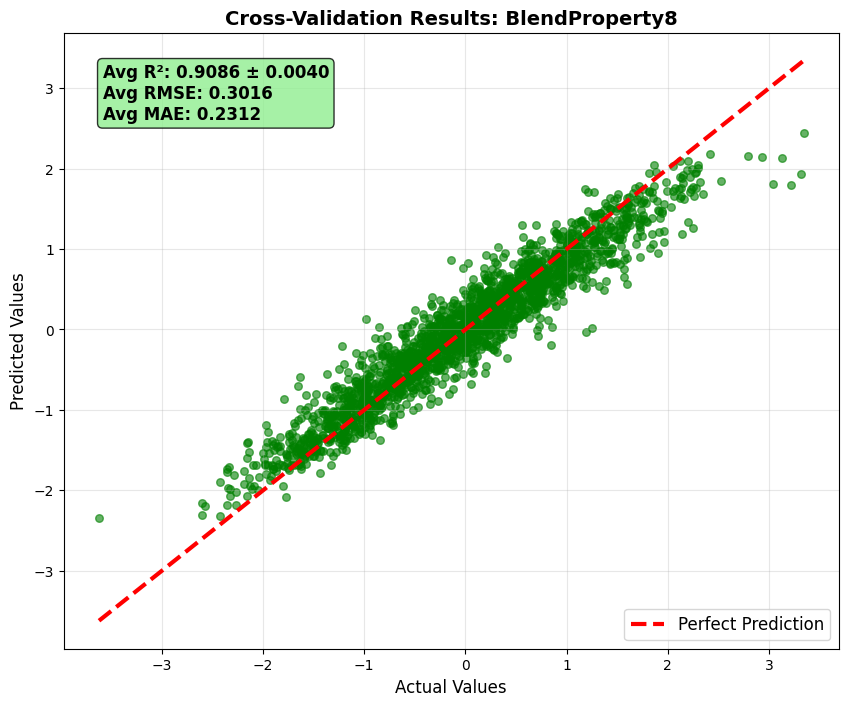

Plot saved as 'cv_predictions_BlendProperty8.png'


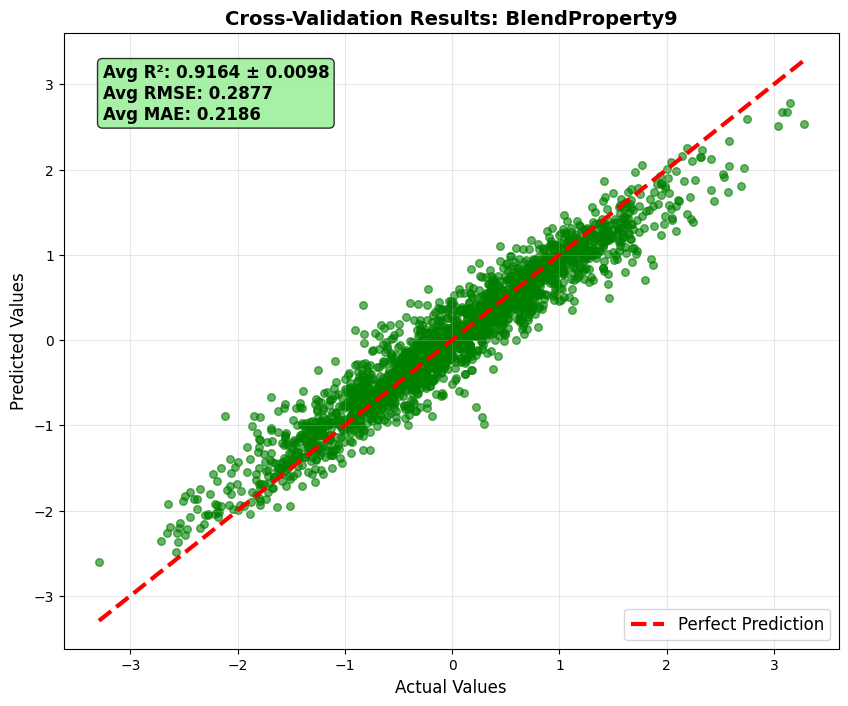

Plot saved as 'cv_predictions_BlendProperty9.png'


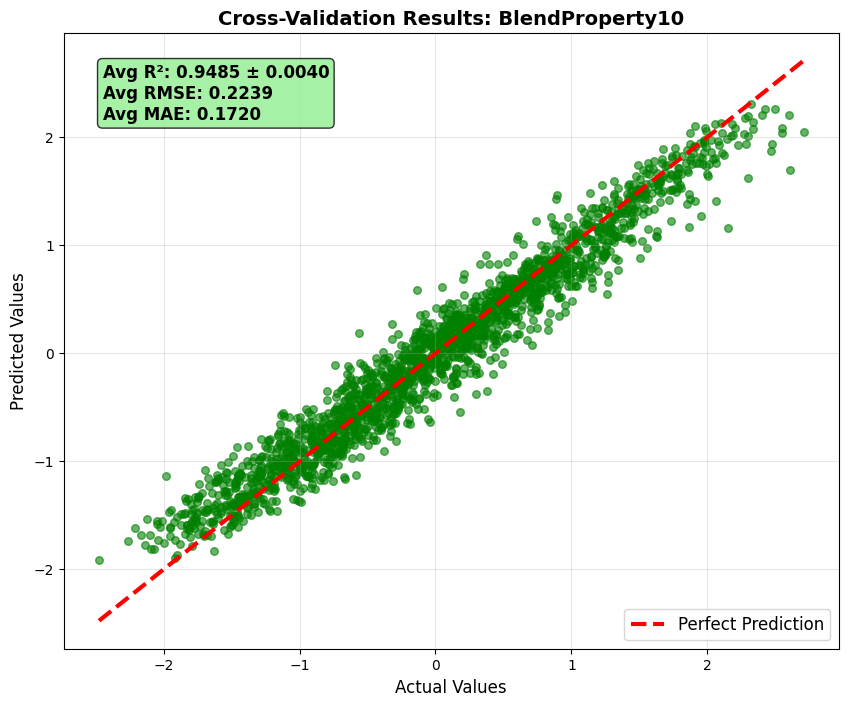

Plot saved as 'cv_predictions_BlendProperty10.png'

CROSS-VALIDATION SUMMARY

BlendProperty1:
  Average RMSE: 0.2674 ± 0.0095
  Average R²:   0.9272 ± 0.0075
  Average MAE:  0.2057 ± 0.0076

BlendProperty2:
  Average RMSE: 0.2506 ± 0.0136
  Average R²:   0.9373 ± 0.0077
  Average MAE:  0.1940 ± 0.0093

BlendProperty3:
  Average RMSE: 0.2185 ± 0.0095
  Average R²:   0.9519 ± 0.0052
  Average MAE:  0.1652 ± 0.0043

BlendProperty4:
  Average RMSE: 0.2630 ± 0.0159
  Average R²:   0.9319 ± 0.0057
  Average MAE:  0.2020 ± 0.0103

BlendProperty5:
  Average RMSE: 0.0685 ± 0.0166
  Average R²:   0.9949 ± 0.0024
  Average MAE:  0.0224 ± 0.0050

BlendProperty6:
  Average RMSE: 0.2889 ± 0.0082
  Average R²:   0.9176 ± 0.0078
  Average MAE:  0.2224 ± 0.0060

BlendProperty7:
  Average RMSE: 0.2176 ± 0.0094
  Average R²:   0.9524 ± 0.0049
  Average MAE:  0.1638 ± 0.0077

BlendProperty8:
  Average RMSE: 0.3016 ± 0.0092
  Average R²:   0.9086 ± 0.0040
  Average MAE:  0.2312 ± 0.0066

BlendProperty9:
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor

# 1. Load data
print("Loading data...")
train_df = pd.read_csv('train.csv')

# 2. Separate features and targets
feature_columns = [col for col in train_df.columns if not col.startswith('Blend')]
target_columns = [col for col in train_df.columns if col.startswith('Blend')]

X_train = train_df[feature_columns]
y_train = train_df[target_columns]

print(f"Training set: {X_train.shape}")
print(f"Features: {len(feature_columns)}")
print(f"Targets: {len(target_columns)}")

# 3. K-Fold Cross Validation with Stratified Sampling
def perform_kfold_cv(X, y, n_splits=5, random_state=42):
    """
    Perform k-fold cross validation with stratified sampling
    """
    print(f"\nPerforming {n_splits}-fold cross validation...")
    
    # Create strata based on the first target variable
    first_target = y.columns[0]
    y_binned = pd.qcut(y[first_target], q=n_splits, labels=False, duplicates='drop')
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize arrays to store predictions for each row
    n_samples = X.shape[0]
    cv_predictions = {target_col: np.zeros(n_samples) for target_col in target_columns}
    cv_actuals = {target_col: np.zeros(n_samples) for target_col in target_columns}
    
    cv_results = {}
    
    for target_col in target_columns:
        print(f"\nCross-validating: {target_col}")
        
        fold_scores = {
            'rmse': [],
            'r2': [],
            'mae': []
        }
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(X, y_binned)):
            print(f"  Fold {fold + 1}/{n_splits}")
            
            # Split data
            X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
            y_fold_train, y_fold_val = y[target_col].iloc[train_idx], y[target_col].iloc[val_idx]
            
            # Train model
            model = XGBRegressor(
                n_estimators=200,
                learning_rate=0.1,
                max_depth=6,
                random_state=random_state,
                n_jobs=-1
            )
            
            model.fit(X_fold_train, y_fold_train)
            
            # Make predictions
            y_pred = model.predict(X_fold_val)
            
            # Store predictions and actuals for this fold
            cv_predictions[target_col][val_idx] = y_pred
            cv_actuals[target_col][val_idx] = y_fold_val.values
            
            # Calculate metrics
            rmse = np.sqrt(mean_squared_error(y_fold_val, y_pred))
            r2 = r2_score(y_fold_val, y_pred)
            mae = mean_absolute_error(y_fold_val, y_pred)
            
            fold_scores['rmse'].append(rmse)
            fold_scores['r2'].append(r2)
            fold_scores['mae'].append(mae)
            
            print(f"    RMSE: {rmse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")
        
        # Calculate average metrics
        avg_rmse = np.mean(fold_scores['rmse'])
        avg_r2 = np.mean(fold_scores['r2'])
        avg_mae = np.mean(fold_scores['mae'])
        std_rmse = np.std(fold_scores['rmse'])
        std_r2 = np.std(fold_scores['r2'])
        std_mae = np.std(fold_scores['mae'])
        
        cv_results[target_col] = {
            'avg_rmse': avg_rmse,
            'avg_r2': avg_r2,
            'avg_mae': avg_mae,
            'std_rmse': std_rmse,
            'std_r2': std_r2,
            'std_mae': std_mae,
            'predictions': cv_predictions[target_col],
            'actuals': cv_actuals[target_col]
        }
        
        print(f"  Average RMSE: {avg_rmse:.4f} ± {std_rmse:.4f}")
        print(f"  Average R²: {avg_r2:.4f} ± {std_r2:.4f}")
        print(f"  Average MAE: {avg_mae:.4f} ± {std_mae:.4f}")
    
    return cv_results

# 4. Perform cross-validation
cv_results = perform_kfold_cv(X_train, y_train, n_splits=5)

# 5. Create comprehensive plots
def plot_cv_predictions(cv_results):
    """Plot cross-validation predictions vs actual for each blend property"""
    target_cols = list(cv_results.keys())
    n_targets = len(target_cols)
    n_cols = 3
    n_rows = (n_targets + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_targets > 1 else [axes]
    
    for i, target_col in enumerate(target_cols):
        if i < len(axes):
            # Get predictions and actuals
            predictions = cv_results[target_col]['predictions']
            actuals = cv_results[target_col]['actuals']
            
            # Create scatter plot
            axes[i].scatter(actuals, predictions, alpha=0.6, s=20, color='blue')
            
            # Add perfect prediction line
            min_val = min(actuals.min(), predictions.min())
            max_val = max(actuals.max(), predictions.max())
            axes[i].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
            
            # Add metrics
            avg_r2 = cv_results[target_col]['avg_r2']
            avg_rmse = cv_results[target_col]['avg_rmse']
            std_r2 = cv_results[target_col]['std_r2']
            
            axes[i].text(0.05, 0.95, f'Avg R²: {avg_r2:.4f} ± {std_r2:.4f}\nAvg RMSE: {avg_rmse:.4f}', 
                        transform=axes[i].transAxes, verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
            
            axes[i].set_xlabel('Actual Values')
            axes[i].set_ylabel('Predicted Values')
            axes[i].set_title(f'{target_col}')
            axes[i].grid(True, alpha=0.3)
            axes[i].legend()
    
    # Hide unused subplots
    for i in range(n_targets, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('Cross-Validation: Predictions vs Actual for All Blend Properties', 
                fontsize=16, fontweight='bold', y=1.02)
    plt.show()

# 6. Create individual plots for each property
def plot_individual_predictions(cv_results):
    """Create individual detailed plots for each blend property"""
    for target_col in cv_results.keys():
        plt.figure(figsize=(10, 8))
        
        predictions = cv_results[target_col]['predictions']
        actuals = cv_results[target_col]['actuals']
        
        # Create scatter plot
        plt.scatter(actuals, predictions, alpha=0.6, s=30, color='green')
        
        # Add perfect prediction line
        min_val = min(actuals.min(), predictions.min())
        max_val = max(actuals.max(), predictions.max())
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=3, label='Perfect Prediction')
        
        # Add metrics
        avg_r2 = cv_results[target_col]['avg_r2']
        avg_rmse = cv_results[target_col]['avg_rmse']
        avg_mae = cv_results[target_col]['avg_mae']
        std_r2 = cv_results[target_col]['std_r2']
        
        plt.text(0.05, 0.95, f'Avg R²: {avg_r2:.4f} ± {std_r2:.4f}\nAvg RMSE: {avg_rmse:.4f}\nAvg MAE: {avg_mae:.4f}', 
                transform=plt.gca().transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
                fontsize=12, fontweight='bold')
        
        plt.xlabel('Actual Values', fontsize=12)
        plt.ylabel('Predicted Values', fontsize=12)
        plt.title(f'Cross-Validation Results: {target_col}', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=12)
        
        # Save plot
        plt.savefig(f'cv_predictions_{target_col}.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"Plot saved as 'cv_predictions_{target_col}.png'")

# 7. Create predictions DataFrame
cv_predictions_df = pd.DataFrame({
    target_col: cv_results[target_col]['predictions'] 
    for target_col in target_columns
})

cv_actuals_df = pd.DataFrame({
    target_col: cv_results[target_col]['actuals'] 
    for target_col in target_columns
})

# 8. Plot results
print("\nCreating visualizations...")
plot_cv_predictions(cv_results)
plot_individual_predictions(cv_results)

# 9. Print comprehensive summary
print("\n" + "="*80)
print("CROSS-VALIDATION SUMMARY")
print("="*80)

for target_col in target_columns:
    result = cv_results[target_col]
    print(f"\n{target_col}:")
    print(f"  Average RMSE: {result['avg_rmse']:.4f} ± {result['std_rmse']:.4f}")
    print(f"  Average R²:   {result['avg_r2']:.4f} ± {result['std_r2']:.4f}")
    print(f"  Average MAE:  {result['avg_mae']:.4f} ± {result['std_mae']:.4f}")

# 10. Save results
cv_predictions_df.to_csv('cv_predictions.csv', index=False)
cv_actuals_df.to_csv('cv_actuals.csv', index=False)
print("\nCross-validation predictions saved to 'cv_predictions.csv'")
print("Cross-validation actuals saved to 'cv_actuals.csv'")

# 11. Show sample predictions
print("\nSample cross-validation predictions:")
print(cv_predictions_df.head())
print("\nSample actual values:")
print(cv_actuals_df.head())

In [2]:
score = model.score(X_test, y_test)
print("Model Score:", score)

NameError: name 'model' is not defined

In [3]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets (e.g., 80% train, 20% test)
X_train_split, X_test, y_train_split, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [4]:
models = {}
scores = {}

for target_col in target_columns:
    print(f"\nTraining model for {target_col}...")
    model = XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train_split, y_train_split[target_col])
    models[target_col] = model

    # Evaluate using .score() (R²)
    score = model.score(X_test, y_test[target_col])
    scores[target_col] = score
    print(f"R² score for {target_col}: {score:.4f}")


Training model for BlendProperty1...
R² score for BlendProperty1: 0.9213

Training model for BlendProperty2...
R² score for BlendProperty2: 0.9312

Training model for BlendProperty3...
R² score for BlendProperty3: 0.9507

Training model for BlendProperty4...
R² score for BlendProperty4: 0.9199

Training model for BlendProperty5...
R² score for BlendProperty5: 0.9900

Training model for BlendProperty6...
R² score for BlendProperty6: 0.9256

Training model for BlendProperty7...
R² score for BlendProperty7: 0.9496

Training model for BlendProperty8...
R² score for BlendProperty8: 0.9017

Training model for BlendProperty9...
R² score for BlendProperty9: 0.9077

Training model for BlendProperty10...
R² score for BlendProperty10: 0.9377
